In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import os


In [4]:
# --- 1. Create the SQLite Database and Table ---
db_file = "sales_data.db"

In [ ]:
# Remove the database file if it already exists to ensure a clean start
if os.path.exists(db_file):
    os.remove(db_file)
    print(f"Removed existing database file: {db_file}")


In [18]:
# --- 2. Connect to sales_data.db---
conn = sqlite3.connect(db_file)
cursor = conn.cursor()

In [7]:
cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        product TEXT NOT NULL,
        quantity INTEGER NOT NULL,
        price REAL NOT NULL,
        sale_date TEXT NOT NULL
    )
''')

In [9]:
# Insert sample data
sales_data = [
    ('Laptop', 2, 1200.00, '2025-05-01'),
    ('Mouse', 5, 25.00, '2025-05-01'),
    ('Keyboard', 3, 75.00, '2025-05-02'),
    ('Monitor', 1, 300.00, '2025-05-02'),
    ('Laptop', 1, 1200.00, '2025-05-03'),
    ('Mouse', 3, 25.00, '2025-05-03'),
    ('Webcam', 2, 50.00, '2025-05-04')
]

cursor.executemany("INSERT INTO sales (product, quantity, price, sale_date) VALUES (?, ?, ?, ?)", sales_data)
conn.commit()
print(f"Database '{db_file}' created and populated with sample data.")

Database 'sales_data.db' created and populated with sample data.


In [ ]:
# --- 3. Run SQL Queries ---

In [ ]:
# Query 1: Sales summary by product
product_summary_query = """
    SELECT
        product,
        SUM(quantity) AS total_qty,
        SUM(quantity * price) AS revenue
    FROM
        sales
    GROUP BY
        product
    ORDER BY
        revenue DESC
"""

In [14]:
# Query 2: Overall sales summary
overall_summary_query = """
    SELECT
        SUM(quantity) AS total_quantity_sold_overall,
        SUM(quantity * price) AS total_revenue_overall
    FROM
        sales
"""

In [15]:
# --- 4. Load into pandas DataFrames ---

print("\n--- Sales Summary by Product ---")
df_product_summary = pd.read_sql_query(product_summary_query, conn)
print(df_product_summary)

print("\n--- Overall Sales Summary ---")
df_overall_summary = pd.read_sql_query(overall_summary_query, conn)
print(df_overall_summary)


--- Sales Summary by Product ---
    product  total_qty  revenue
0    Laptop          3   3600.0
1   Monitor          1    300.0
2  Keyboard          3    225.0
3     Mouse          8    200.0
4    Webcam          2    100.0

--- Overall Sales Summary ---
   total_quantity_sold_overall  total_revenue_overall
0                           17                 4425.0



Bar chart saved as 'sales_chart.png'


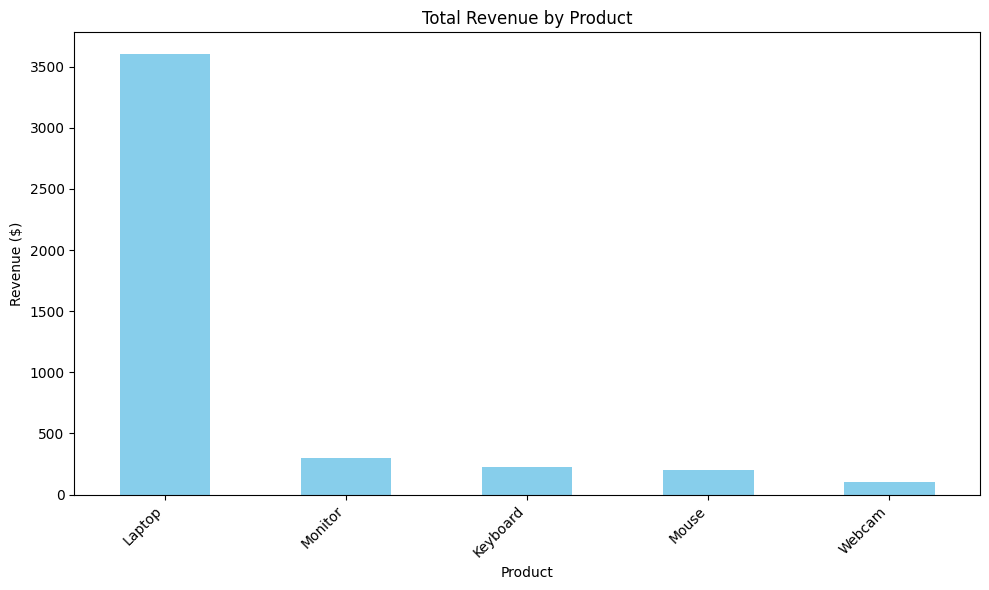

In [16]:
# --- 5. Plot simple bar chart and save ---
if not df_product_summary.empty:
    plt.figure(figsize=(10, 6))
    df_product_summary.plot(kind='bar', x='product', y='revenue', legend=False, ax=plt.gca(), color='skyblue')
    plt.title('Total Revenue by Product')
    plt.xlabel('Product')
    plt.ylabel('Revenue ($)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    chart_file = "sales_chart.png"
    plt.savefig(chart_file)
    print(f"\nBar chart saved as '{chart_file}'")
else:
    print("\nNo data to plot for product summary.")


In [17]:
# Close the database connection
conn.close()
print("Database connection closed.")

Database connection closed.
